<a href="https://colab.research.google.com/github/Likelipop/03-IML/blob/main/Homework_Form_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

** Submit Link **: https://forms.gle/aAjeG25RPUtQHijs9

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

Age- Age Of The Customer

Employment Type- The Sector In Which Customer Is Employed

GraduateOrNot- Whether The Customer Is College Graduate Or Not

AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]

FamilyMembers- Number Of Members In Customer's Family

ChronicDisease- Whether The Customer Suffers From Any Major Disease Or
Conditions Like Diabetes/High BP or Asthama,etc.

FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]

TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
!git clone https://github.com/Likelipop/03-IML.git

Cloning into '03-IML'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 76 (delta 34), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 3.74 MiB | 5.54 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [72]:
import pandas as pd
PATH = "/content/03-IML/TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Analysis

In [73]:
pip install ydata-profiling

In [74]:
# Data analysis
# Todo: analyze your data here

# Get categorical columns and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns


In [75]:
from ydata_profiling import ProfileReport

In [76]:
profile = ProfileReport(df, title="Profiling Report")

In [77]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 42.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [78]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Missing values:
 Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Number of duplicate rows: 0


## Preprocessing

In [79]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.dropna()
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    return df

In [80]:
df = preprocessing_data(df.copy())

In [81]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

In [82]:
df.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

<Axes: >

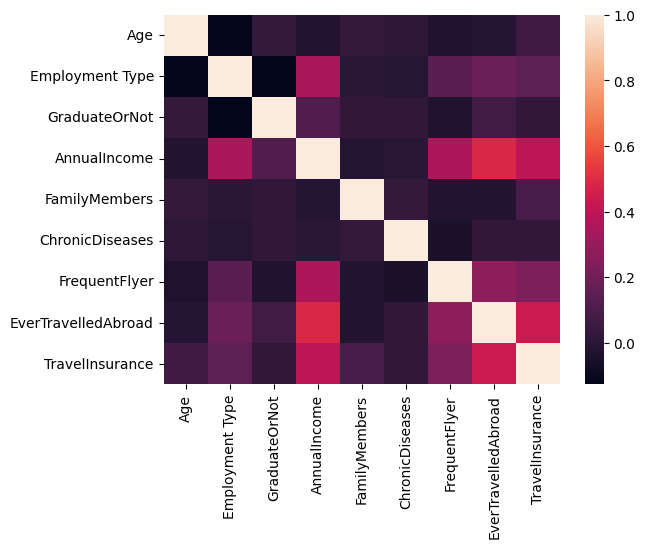

In [83]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    for col in categorical_cols:
        df[col] = df[col].astype('category').cat.codes

    df.drop(columns = 'Unnamed: 0', inplace= True)
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [84]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(columns = 'TravelInsurance')
    y = df['TravelInsurance']# Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [85]:
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,0,1,400000,6,1,0,0
1,31,1,1,1250000,7,0,0,0
2,34,1,1,500000,4,1,0,0
3,28,1,1,700000,3,1,0,0
4,28,1,1,700000,8,1,1,0


In [86]:
y.head()

,TravelInsurance
0,0
1,0
2,1
3,0
4,0


# Apply machine learning model

## Train-test split

In [87]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.3

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [88]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a trained model
    """

    pipeline = make_pipeline(
        DecisionTreeClassifier()
    )

    param_grid = {
        'decisiontreeclassifier__max_depth': [3, 5, 10, 20, None],
        'decisiontreeclassifier__min_samples_split': [2, 5, 10, 20],
        'decisiontreeclassifier__min_samples_leaf': [1, 2, 4, 6],
        'decisiontreeclassifier__max_features': [None, 'sqrt', 'log2'],
        'decisiontreeclassifier__criterion': ['gini', 'entropy']
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)

    return grid_search.best_estimator_, grid_search.best_params_

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return: main score (F1-score in this case)
    """
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    accuracy = report['accuracy']


    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    print(classification_report(y_true, y_pred))
    # Choose one main metric to return
    main_score = f1
    return main_score


model, param = build_model(trainX, trainY)
pred = model.predict(testX)
score = calculate_performance(testY, pred)
print(f"best param: ",param)


Precision: 0.8373523958891007
Recall: 0.8238677210639828
Accuracy: 0.8238677210639828
F1 Score: 0.8110736256855723
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       906
           1       0.90      0.55      0.69       485

    accuracy                           0.82      1391
   macro avg       0.85      0.76      0.78      1391
weighted avg       0.84      0.82      0.81      1391

best param:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 5}


In [89]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(model, feature_names, top_n=20, model_name = 'randomforestclassifier' ):
    """
    Plots the top N feature importances from a trained Random Forest model.

    :param model: Trained pipeline with RandomForestClassifier
    :param feature_names: List of feature names (columns in X)
    :param top_n: Number of top features to show
    """

    # Extract the RandomForestClassifier from the pipeline
    rf = model.named_steps[model_name]

    # Get feature importances
    importances = rf.feature_importances_
    indices = np.argsort(importances)[-top_n:][::-1]  # Top N features

    # Plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Top Feature Importances ({model_name})")
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Importance Score")
    plt.gca().invert_yaxis()  # Highest at top
    plt.tight_layout()
    plt.show()


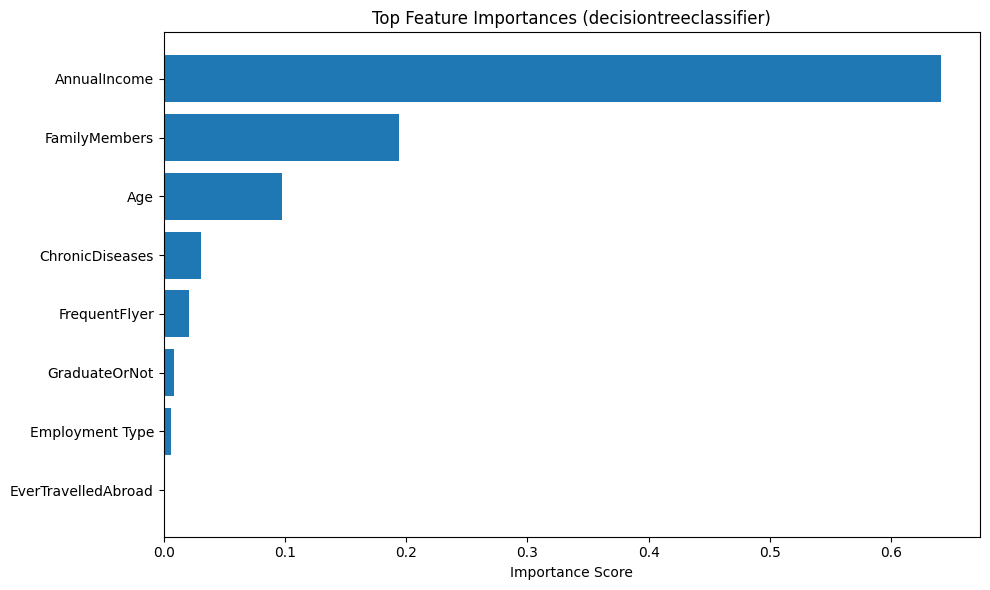

In [90]:
plot_feature_importance(model, feature_names=trainX.columns,model_name =  'decisiontreeclassifier' )

<h3>IMBALANCE DATA </h3>

<Axes: xlabel='TravelInsurance', ylabel='count'>

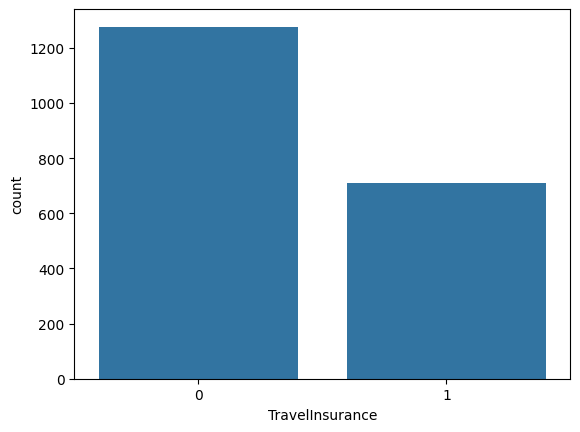

In [24]:
import seaborn as sns

y.value_counts()
sns.countplot(x=y, data=pd.DataFrame(y))

<h3>Upsampling model </h3>

In [31]:
from sklearn.utils import resample


def upsampling(df, target_cols):
    df_max = df[df[target_cols] == 0]
    df_min = df[df[target_cols] == 1]

    df_min_upsampled = resample(df_min,
                                replace=True,
                                n_samples=len(df_max),
                                random_state=42)

    df_min_upsampled = pd.concat([df_min_upsampled, df_max])
    print(df_min_upsampled[target_cols].value_counts())
    return df_min_upsampled

df = upsampling(df, 'TravelInsurance')
X,y = prepare_X_y(df)
trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

TravelInsurance
1    1277
0    1277
Name: count, dtype: int64


In [32]:
model = build_model(trainX, trainY)
pred = model.predict(testX)
score = calculate_performance(testY, pred)

Precision: 0.8458928571428572
Recall: 0.8053691275167785
Accuracy: 0.8053691275167785
F1 Score: 0.7994965372434834
              precision    recall  f1-score   support

           0       0.73      0.98      0.83       894
           1       0.96      0.63      0.77       894

    accuracy                           0.81      1788
   macro avg       0.85      0.81      0.80      1788
weighted avg       0.85      0.81      0.80      1788



<h3>SMOTE </h3>

In [33]:
!pip install imbalanced-learn

In [40]:
from imblearn.over_sampling import SMOTE

def apply_smote(X, y, sampling_strategy='auto', random_state=42, k_neighbors=5):
    smote = SMOTE(sampling_strategy=sampling_strategy,
                  random_state=random_state,
                  k_neighbors=k_neighbors)

    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

X, y = apply_smote(X, y)
trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [41]:
model = build_model(trainX, trainY)
pred = model.predict(testX)
score = calculate_performance(testY, pred)

Precision: 0.8458928571428572
Recall: 0.8053691275167785
Accuracy: 0.8053691275167785
F1 Score: 0.7994965372434834
              precision    recall  f1-score   support

           0       0.73      0.98      0.83       894
           1       0.96      0.63      0.77       894

    accuracy                           0.81      1788
   macro avg       0.85      0.81      0.80      1788
weighted avg       0.85      0.81      0.80      1788



<h3> RANDOM FOREST </h3>

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def build_model(X, y):
    """
    Design your model and train it using RandomForestClassifier (with best params via GridSearchCV)
    :param X: feature matrix
    :param y: target
    :return: a trained model
    """

    pipeline = make_pipeline(
        RandomForestClassifier(random_state=42)
    )

    param_grid = {
        'randomforestclassifier__n_estimators': [10, 20, 50],
        'randomforestclassifier__max_depth': [5, 10, 20, None],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4],
        'randomforestclassifier__max_features': ['sqrt', 'log2', None],
        'randomforestclassifier__bootstrap': [True, False]
    }

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='f1_weighted',  # or 'f1' for binary classification
        n_jobs=-1
    )


    grid_search.fit(X, y)

    return grid_search.best_estimator_, grid_search.best_params_


In [49]:
model,param = build_model(trainX, trainY)
pred = model.predict(testX)
score = calculate_performance(testY, pred)

print(f"best param: ",param)

Precision: 0.8319440817756265
Recall: 0.8260626398210291
Accuracy: 0.8260626398210291
F1 Score: 0.8252887488716635
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       894
           1       0.88      0.76      0.81       894

    accuracy                           0.83      1788
   macro avg       0.83      0.83      0.83      1788
weighted avg       0.83      0.83      0.83      1788

best param:  {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 50}


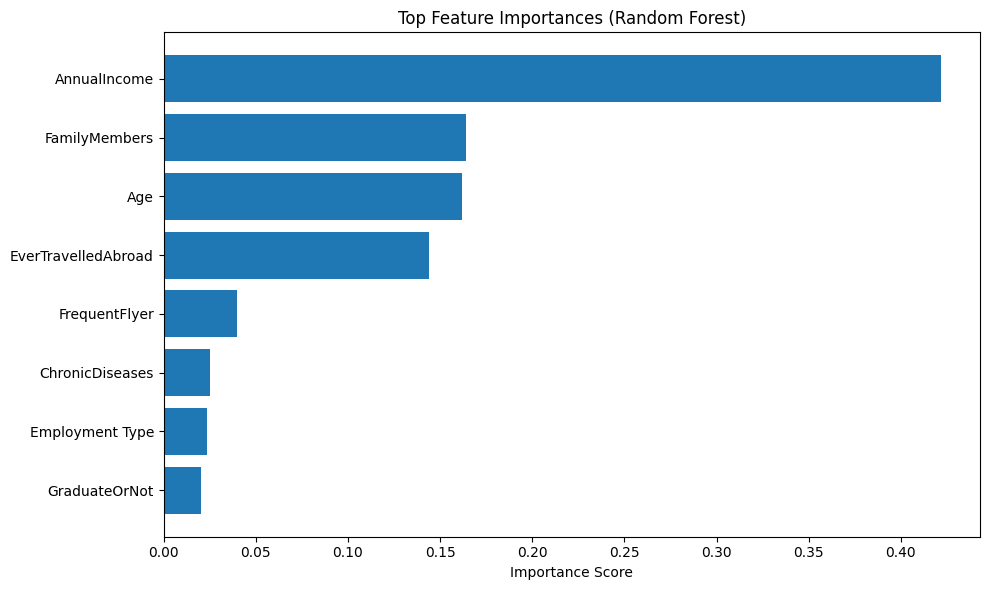

In [51]:
plot_feature_importance(model, feature_names=trainX.columns)

In [46]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. Using F1 score as the main evaluation metric is more suitable when dealing with imbalanced classes, " \
           "as it balances precision and recall. " \
           "Other conclusion: Random Forest performed better than Decision Tree due to its ensemble nature, " \
           "reducing overfitting and improving generalization."
